In [ ]:
import numpy as np
import pickle
import pandas as pd
clust=np.load('weights.npy')
with open("km.sav", "rb") as f:
    model = pickle.load(f)

In [ ]:
X_test=pd.read_csv('v1.csv').iloc[-3000::]
df = pd.read_csv('v1.csv').iloc[0:-3000]
df.drop('timestamp',axis=1,inplace=True)
train_set1 = df.copy()
X_test.drop('timestamp',axis=1,inplace=True)

In [ ]:
test=X_test.copy()
display(test)
i=0
for column in test.columns:
    test[column] = test[column] / train_set1[column].abs().max()
for col in ['ACTIVE_POWER', 'B_PHASE_CURRENT', 'B_R_PHASE_VOLTAGE','MPPT1_POWER','STR07/DC_CURRENT','STR07/DC_VOLTAGE']:
    test[col].iloc[i*400:(i*400+20)] = np.nan
    i+=1
missing = ~np.isfinite(test)
mu = np.nanmean(test, 0, keepdims=1)
Test10 = np.where(missing, mu, test)
label = model.predict(Test10)

In [ ]:
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
for i in range(len(label)):
  c=label[i]
  coor=find_BMU(clust[c],Test10[i].reshape(1,33))
  print(coor)
  a=coor[0]
  b=coor[1]
  for j in range(33):
    if missing.values[i][j]==True:
      vector=clust[c][a][b]
      Test10[i][j] = vector[j]

Final= pd.DataFrame(Test10, columns =df.columns)
for column in Final.columns:
    Final[column] = Final[column] * train_set1[column].abs().max()

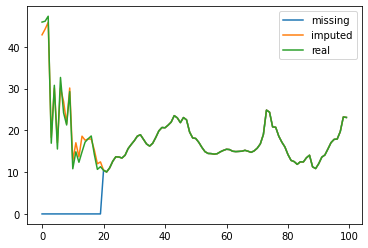

In [ ]:
i=list(Final["ACTIVE_POWER"])
r=list(X_test["ACTIVE_POWER"])
m=list(missing["ACTIVE_POWER"])
miss=[]
for j in range(len(i)):
  if m[j]:
    miss.append(0)
  else:
    miss.append(r[j])
feat_df=pd.DataFrame(pd.DataFrame({"missing":miss,'imputed':i,"real":r}))
feat_df.iloc[0:100].plot(subplots=False)

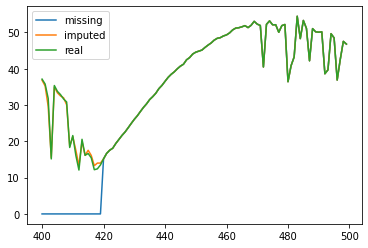

In [ ]:
i=list(Final['B_PHASE_CURRENT'])
r=list(X_test['B_PHASE_CURRENT'])
m=list(missing['B_PHASE_CURRENT'])
miss=[]
for j in range(len(i)):
  if m[j]:
    miss.append(0)
  else:
    miss.append(r[j])
feat_df=pd.DataFrame(pd.DataFrame({"missing":miss,'imputed':i,"real":r}))
feat_df.iloc[400:500].plot(subplots=False)

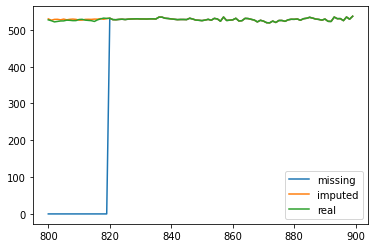

In [ ]:
i=list(Final['B_R_PHASE_VOLTAGE'])
r=list(X_test['B_R_PHASE_VOLTAGE'])
m=list(missing['B_R_PHASE_VOLTAGE'])
miss=[]
for j in range(len(i)):
  if m[j]:
    miss.append(0)
  else:
    miss.append(r[j])
feat_df=pd.DataFrame(pd.DataFrame({"missing":miss,'imputed':i,"real":r}))
feat_df.iloc[800:900].plot(subplots=False)

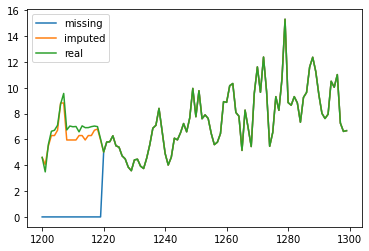

In [ ]:
i=list(Final['MPPT1_POWER'])
r=list(X_test['MPPT1_POWER'])
m=list(missing['MPPT1_POWER'])
miss=[]
for j in range(len(i)):
  if m[j]:
    miss.append(0)
  else:
    miss.append(r[j])
feat_df=pd.DataFrame(pd.DataFrame({"missing":miss,'imputed':i,"real":r}))
feat_df.iloc[1200:1300].plot(subplots=False)

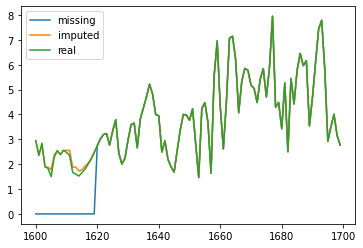

In [ ]:
i=list(Final['STR07/DC_CURRENT'])
r=list(X_test['STR07/DC_CURRENT'])
m=list(missing['STR07/DC_CURRENT'])
miss=[]
for j in range(len(i)):
  if m[j]:
    miss.append(0)
  else:
    miss.append(r[j])
feat_df=pd.DataFrame(pd.DataFrame({"missing":miss,'imputed':i,"real":r}))
feat_df.iloc[1600:1700].plot(subplots=False)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
def getPerformanceMetrics(Y_test, Y_predicted):
    Mean_Squared_Error = mean_squared_error(Y_test, Y_predicted)
    Mean_Absolute_Error = mean_absolute_error(Y_test, Y_predicted)
    Root_Mean_Squared_Error = np.sqrt(mean_squared_error(Y_test,Y_predicted)
    return {"MSE":Mean_Squared_Error, "MAE":Mean_Absolute_Error, 'RMSE':Root_Mean_Squared_Error}